In [98]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import linalg as LA

from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier

%matplotlib inline

In [47]:
data = pd.read_csv('./mushrooms.csv')

In [32]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


## Column description

Attribute Information: (classes: edible=e, poisonous=p)

Here is the attribute information with the remaining attributes prefixed by an asterisk (*):
  
* **cap-shape**: bell=b, conical=c, convex=x, flat=f, knobbed=k, sunken=s
* **cap-surface**: fibrous=f, grooves=g, scaly=y, smooth=s
* **cap-color**: brown=n, buff=b, cinnamon=c, gray=g, green=r, pink=p, purple=u, red=e, white=w, yellow=y
* **bruises**: bruises=t, no=f
* **odor**: almond=a, anise=l, creosote=c, fishy=y, foul=f, musty=m, none=n, pungent=p, spicy=s
* **gill-attachment**: attached=a, descending=d, free=f, notched=n
* **gill-spacing**: close=c, crowded=w, distant=d
* **gill-size**: broad=b, narrow=n
* **gill-color**: black=k, brown=n, buff=b, chocolate=h, gray=g, green=r, orange=o, pink=p, purple=u, red=e, white=w, yellow=y
* **stalk-shape**: enlarging=e, tapering=t
* **stalk-root**: bulbous=b, club=c, cup=u, equal=e, rhizomorphs=z, rooted=r, missing=?
* **stalk-surface-above-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-surface-below-ring**: fibrous=f, scaly=y, silky=k, smooth=s
* **stalk-color-above-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **stalk-color-below-ring**: brown=n, buff=b, cinnamon=c, gray=g, orange=o, pink=p, red=e, white=w, yellow=y
* **veil-type**: partial=p, universal=u
* **veil-color**: brown=n, orange=o, white=w, yellow=y
* **ring-number**: none=n, one=o, two=t
* **ring-type**: cobwebby=c, evanescent=e, flaring=f, large=l, none=n, pendant=p, sheathing=s, zone=z
* **spore-print-color**: black=k, brown=n, buff=b, chocolate=h, green=r, orange=o, purple=u, white=w, yellow=y
* **population**: abundant=a, clustered=c, numerous=n, scattered=s, several=v, solitary=y
* **habitat**: grasses=g, leaves=l, meadows=m, paths=p, urban=u, waste=w, woods=d

In [33]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [50]:
def encode_column(col_name):
    le = LabelEncoder()
    le.fit(col_name)

    return le.transform(col_name)

In [51]:
col_names = data.columns
for col_name in col_names:
    data[col_name] = encode_column(data[col_name])

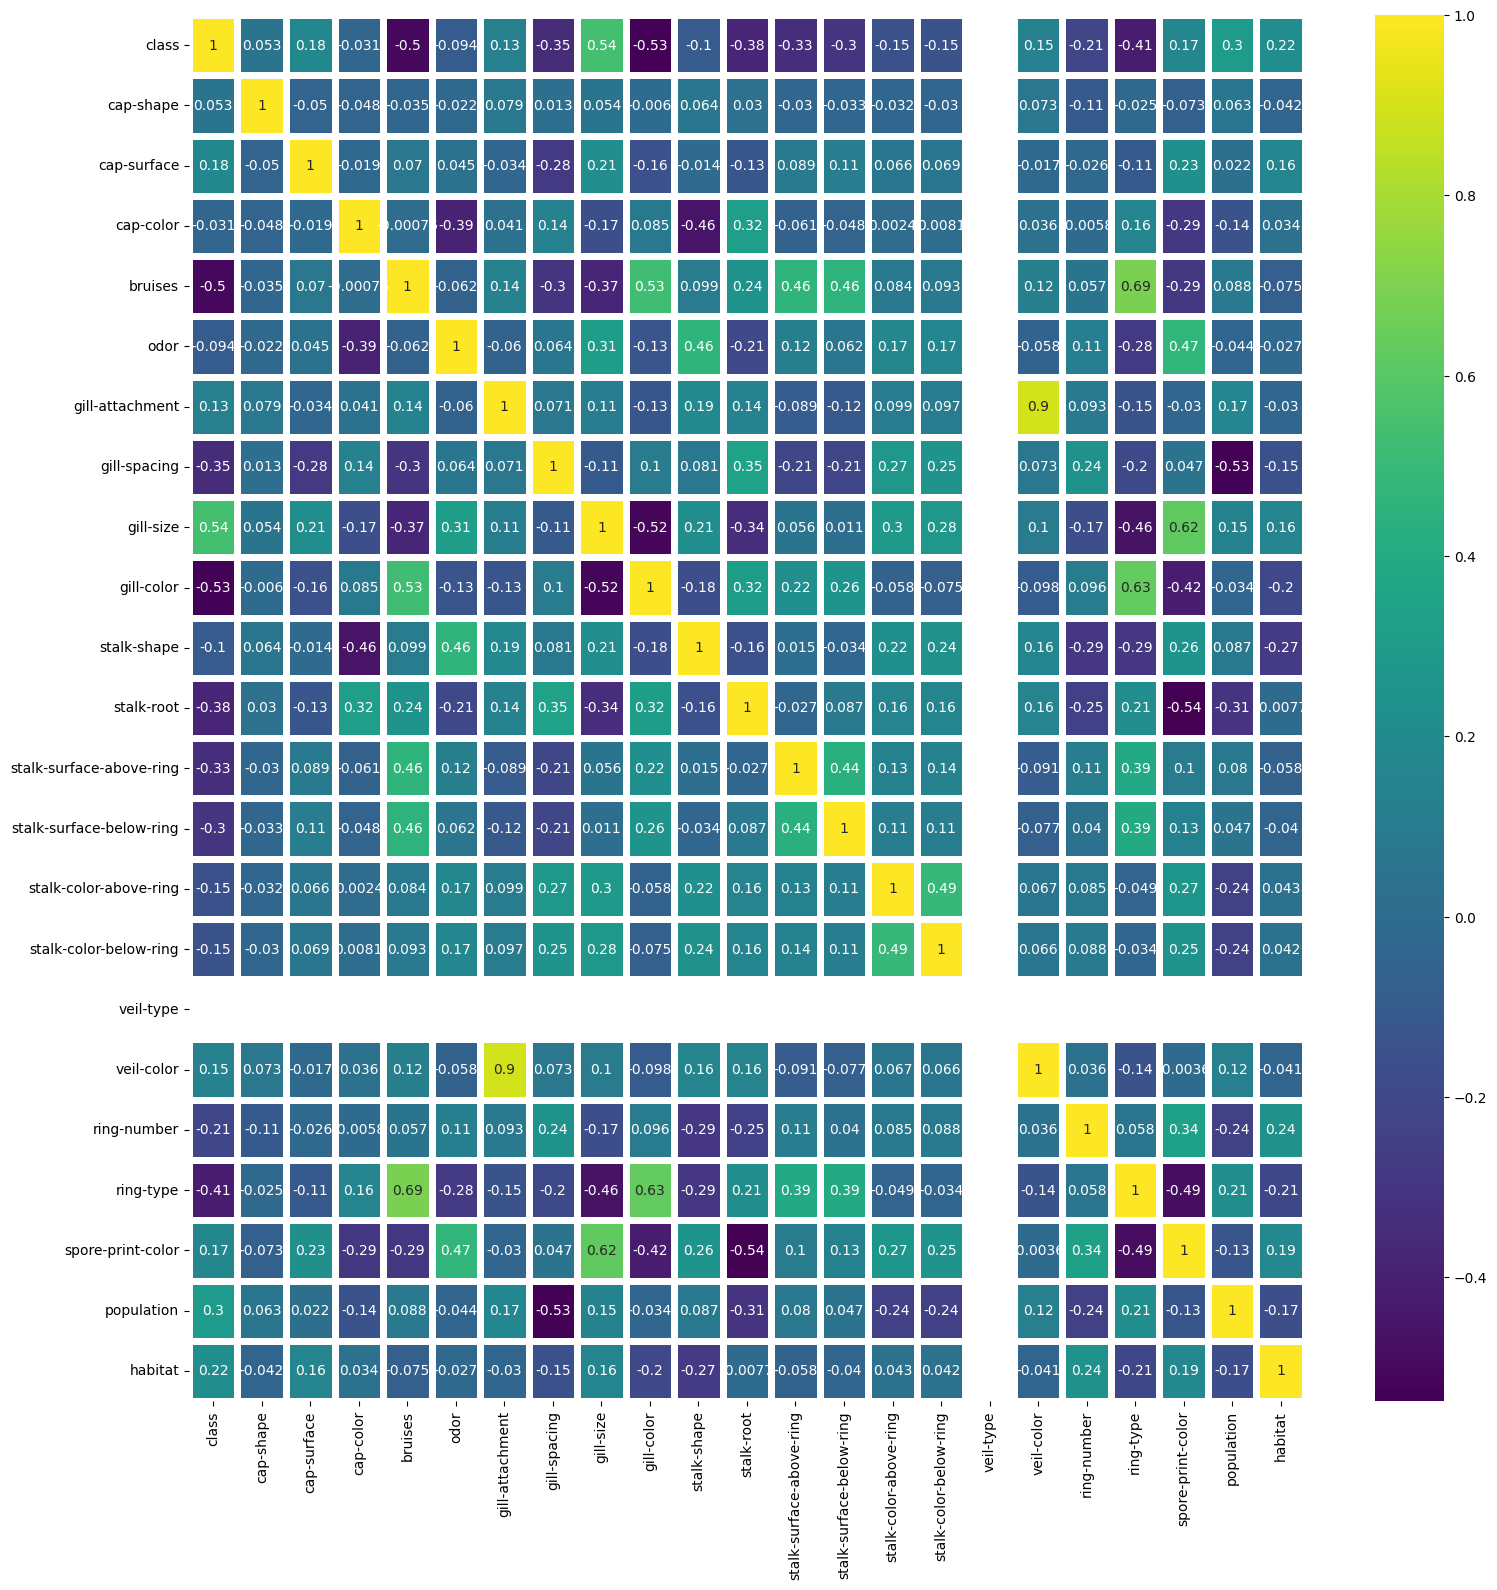

In [52]:
plt.figure(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, cmap='viridis', linewidths=5)
plt.show()

In [66]:
Y = data['class']
Y = np.array(Y)
X = data.drop(['class'], axis=1)

X, Y = shuffle(X, Y, random_state=42)

In [67]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [68]:
Cov = np.cov(X, rowvar=False)
w, v = LA.eig(Cov)

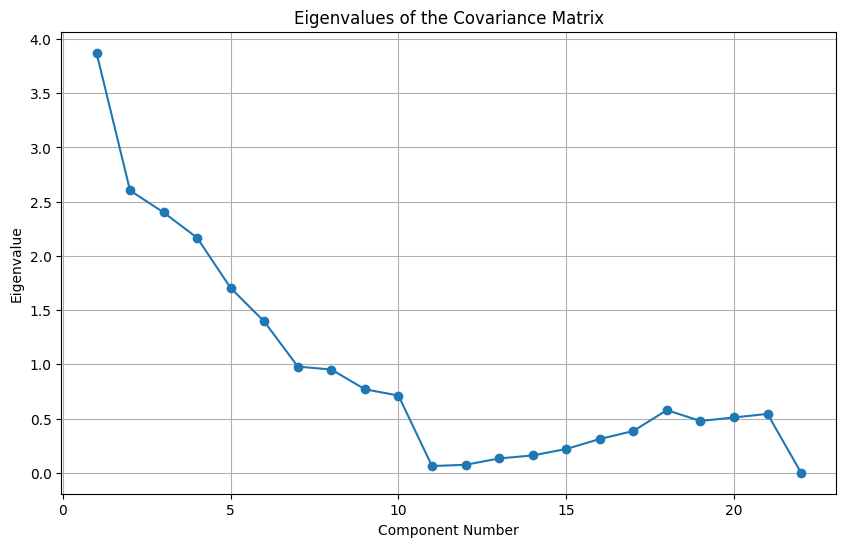

In [69]:
# Plot the eigenvalues
plt.figure(figsize=(10, 6))
plt.plot(np.arange(1, len(w) + 1), w, marker='o')
# plt.yscale('log')
plt.title('Eigenvalues of the Covariance Matrix')
plt.xlabel('Component Number')
plt.ylabel('Eigenvalue')
# plt.xlim(1, 10)
plt.grid(True)
plt.show()

In [71]:
pca1 = PCA(n_components=7)
pca2 = PCA(n_components=10)

In [75]:
X1 = pca1.fit_transform(X)
X2 = pca2.fit_transform(X)

## Split data

### PCA1

In [88]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y, test_size=0.2, random_state=42)

In [89]:
rf_model1 = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [90]:
rf_model1.fit(X_train1, Y_train1)
y_pred1 = rf_model1.predict(X_test1)

# Check accuracy

### Train data

In [91]:
accuracy_train1 = round(rf_model1.score(X_train1, Y_train1)*100, 2)
print(f'Accuracy: {accuracy_train1}%')

Accuracy: 100.0%


### Test data

In [92]:
accuracy_test1 = round(rf_model1.score(X_test1, Y_test1)*100, 2)
print(f'Accuracy: {accuracy_test1}%')

Accuracy: 99.94%


## Classification report

In [102]:
report1 = classification_report(Y_test1, y_pred1)
print(report1)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625



### PCA2

In [93]:
X_train2, X_test2, Y_train2, Y_test2 = train_test_split(X2, Y, test_size=0.2, random_state=42)

In [94]:
rf_model2 = RandomForestClassifier(n_estimators=300, n_jobs=-1)

In [95]:
rf_model2.fit(X_train2, Y_train2)
y_pred2 = rf_model2.predict(X_test2)

# Check accuracy

### Train data

In [96]:
accuracy_train2 = round(rf_model2.score(X_train2, Y_train2)*100, 2)
print(f'Accuracy: {accuracy_train2}%')

Accuracy: 100.0%


### Test data

In [97]:
accuracy_test2 = round(rf_model2.score(X_test2, Y_test2)*100, 2)
print(f'Accuracy: {accuracy_test2}%')

Accuracy: 100.0%


## Classification report

In [101]:
report2 = classification_report(Y_test2, y_pred2)
print(report2)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

